In [1]:
import collections
from operator import itemgetter
import json

import networkx as nx
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def ParseJSONtoDict (filename):
    # Read JSON data into the datastore variable
    if filename:
        with open(filename, 'r') as f:
            datastore = json.load(f)
    return datastore


In [3]:
# Store data into JSON
def SaveNodesEdgesinJSON (nodes, edges, fileName):
    with open('json/'+fileName+'Nodes.json', 'w') as json_file:
        json.dump(nodes, json_file)

    with open('json/'+fileName+'Edges.json', 'w') as json_file:
        json.dump(edges, json_file)

In [4]:
class Networks:
    
    def __init__ (self):
        self.scseGraph = nx.Graph()
        self.scseMultiGraph = nx.MultiGraph()
        self.CoauthorGraph = nx.MultiGraph()
        self.CreateScseNetwork()
        self.CreateCoauthorNetwork()
        
    def CreateScseNetwork (self):
        nodes = ParseJSONtoDict('json/ScseStaffNodes.json')
        edges = ParseJSONtoDict('json/ScseStaffEdges.json')
        self.scseGraph.add_nodes_from(nodes)
        self.scseGraph.add_edges_from(edges)
        self.scseMultiGraph.add_nodes_from(nodes)
        self.scseMultiGraph.add_edges_from(edges)
    def CreateCoauthorNetwork (self):
        nodes = ParseJSONtoDict('json/CoauthorNodes.json')
        edges = ParseJSONtoDict('json/CoauthorEdges.json')
        self.CoauthorGraph.add_nodes_from(nodes)
        self.CoauthorGraph.add_edges_from(edges)

        
    def GetScseNetwork(self):
        return self.scseGraph
    
    def GetScseMultiNetwork(self):
        return self.scseMultiGraph
    
    def GetCoauthorNetwork(self):
        return self.CoauthorGraph
# Redundant
#     def GetNumberOfCoAuthors(self):
#         return len(self.CoauthorGraph.nodes)



In [5]:
networks.GetScseNetwork()

NameError: name 'networks' is not defined

In [43]:
# inititalize networks class to create networkx graphs
networks = Networks()

In [6]:
#print(networks.GetNumberOfCoAuthors())
print("********************")
#print(networks.authorGraph.edges())
print(networks.CoauthorGraph.number_of_nodes())
print(networks.CoauthorGraph.number_of_edges())


********************


NameError: name 'networks' is not defined

In [7]:
nx.draw_kamada_kawai(networks.GetScseNetwork(),with_labels=False)

NameError: name 'networks' is not defined

In [8]:

# G=nx.Graph()
# G.add_node("a")
# G.add_nodes_from(["b","c"])

# G.add_edge(1,2)
# edge = ("d", "e")
# G.add_edge(*edge)
# edge = ("a", "b")
# G.add_edge(*edge)

# print("Nodes of graph: ")
# print(G.nodes())
# print("Edges of graph: ")
# print(G.edges())

In [9]:
#nx.draw(networks.GetScseNetwork(),with_labels=True, font_weight='bold')

In [10]:
#nx.info(networks.GetCoauthorNetwork())
#sort according to degree
mesh = sorted(networks.GetCoauthorNetwork().degree, key=lambda x: x[1], reverse=True)
k = [i[0] for i in mesh]

top_1000 = k[:1075]
top_1000graph = networks.GetCoauthorNetwork().subgraph(top_1000).copy()

NameError: name 'networks' is not defined

In [11]:
nx.info(top_1000graph)

NameError: name 'top_1000graph' is not defined

In [12]:
top_1000graph.nodes.data()

NameError: name 'top_1000graph' is not defined

In [13]:
#G = nx.path_graph(4)
centrality = nx.eigenvector_centrality(networks.GetScseNetwork())
sorted((v, f"{c:f}") for v, c in centrality.items())
#sorted([(c, v) for v, c in centrality.items()], reverse = True)
#print(centrality)

NameError: name 'networks' is not defined

In [14]:
tier1 = [] 
for node in networks.GetScseNetwork().nodes.data():
    if node[1]["tier1cnt"] > 0:
        tier1.append(node[0])
print(tier1)

NameError: name 'networks' is not defined

In [15]:
def GetScseDegreeDistribution(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    degList, degCountList = zip(*degreeCount.items())

    N = len(graph.nodes)
    pk = []
    for cnt in degCountList:
        pk.append(cnt/N)

    degList = sorted(degList)
    pk = sorted(pk, reverse=True)

    plt.figure()
    plt.scatter(degList, pk, c="r", s=10)

    plt.yscale('log')
    plt.xscale('log')

    axes = plt.gca()
    axes.set_xlim([0.9,max(degList)])
    axes.set_ylim([min(pk)*0.5, 1])

    plt.title("Author Degree Distribution")
    plt.ylabel("Pk")
    plt.xlabel("Degree")
    # plt.savefig("AuthorDegreeDistribution.png")
    # graph too large to be drawn, but algorithms based on degree etc, can be done
    return plt, degList, pk

In [16]:
GetScseDegreeDistribution(networks.GetScseNetwork())

NameError: name 'networks' is not defined

In [17]:
def FilterScseYear(Graph, startyear=2000, endyear=2020, min=1, minSuccess = 0):
    filteredNodes = []
    varyingyear = startyear
    results = []
    
    while (varyingyear <= endyear):

        for node in Graph.nodes.data():
            if node[1]['start'] < varyingyear and node[1]['end'] > varyingyear:
                filteredNodes.append(node[0])

        subGraph = Graph.subgraph(filteredNodes).copy()
        results.append(nx.info(subGraph))
        print("year ",varyingyear)
        print(nx.info(subGraph))
        density = nx.density(subGraph)
        print("Network density:", density)
#        print(nx.is_connected(Graph))
        components = nx.connected_components(subGraph)
#        print(type(components))
        largest_component = max(components, key=len)

        # Create a "subgraph" of just the largest component
        # Then calculate the diameter of the subgraph, just like you did with density.
        #
        subgraph = Graph.subgraph(largest_component)
        diameter = nx.diameter(subgraph)
        print("Network diameter of largest component:", diameter)
        varyingyear += 1

    return results

In [18]:
G = FilterScseYear(networks.GetScseMultiNetwork(), startyear=2000, endyear=2021, min=1, minSuccess = 0)

NameError: name 'networks' is not defined

In [19]:
print(G)

NameError: name 'G' is not defined

In [20]:

def DrawGraph(graph):
    nodessize = []
    edgecolors = []
    nodescolor = []

    edgeslist = graph.edges.data()

    for node in graph.nodes.data():
        nodessize.append(node[1]['size'])
        if node[1]['tier'] == 1:
            nodescolor.append([1,0,0])
        elif node[1]['tier'] == 2:
            nodescolor.append([1,0.2,0.2])
        elif node[1]['tier'] == 3:
            nodescolor.append([1,0.4,0.4])

    maxSize = max(nodessize)
    minSize = min(nodessize)
    maxNodeSize = 5000
    for size in nodessize:
        size = (size - minSize) / (maxSize -minSize) * maxNodeSize + 1000

    edgemax = max(edgeslist, key=lambda x: x[2]['weight'])[2]['weight']
    edgemin = min(edgeslist, key=lambda x: x[2]['weight'])[2]['weight']
    M = graph.number_of_edges()
    edgealphas = []
    for edge in edgeslist:
        weight = edge[2]['weight']
        color = (weight - edgemin) / (edgemax - edgemin)
        edgecolors.append(color)
        edgealphas.append(color)

    # plt.figure(figsize=(20,20))
    pos=nx.spring_layout(graph, k=5)

    nx.draw_networkx_nodes(
        graph,
        pos=pos,
        node_color=nodescolor,
        node_size=nodessize
    )

    edges = nx.draw_networkx_edges(
        graph,
        pos=pos,
        arrowstyle="->",
        arrowsize=5,
        edge_color=edgecolors,
        edge_cmap=plt.cm.Greys,
        width=1,
    )

    nx.draw_networkx_labels(
        graph, pos=pos, font_size=6,
        font_color='k', font_family='sans-serif',
        font_weight='normal', alpha=None,
        bbox=None, ax=None
    )

    # set alpha value for each edge
    for i in range(M):
        edges[i].set_alpha(edgealphas[i])


In [21]:
GetScseReputationDistribution(data.GetCoauthorNetwork())

NameError: name 'GetScseReputationDistribution' is not defined

In [22]:
DrawGraph(top_1000graph)

NameError: name 'top_1000graph' is not defined

In [23]:
print(type(G))

NameError: name 'G' is not defined

In [24]:
#filterby: 'management','position','area'
#rank(management): "Y"
def filterGraphs(graph, filterby, rank1, rank2 = None):
    filteredNodes= []
    if rank2:
        for node in graph.nodes.data():
            if node[1][filterby] == rank1 or node[1][filterby]== rank2:
                filteredNodes.append(node[0])
    else:
        for node in graph.nodes.data():
            if node[1][filterby] == rank1:
                filteredNodes.append(node[0])

    subGraph = graph.subgraph(filteredNodes).copy()
    return subGraph

In [25]:
G = filterGraphs(networks.GetScseNetwork(), "management", "Y")

NameError: name 'networks' is not defined

In [26]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G))

NameError: name 'G' is not defined

In [27]:
nx.draw_kamada_kawai(G,with_labels=True)
plt.show()

NameError: name 'G' is not defined

In [28]:
type(fig)

NameError: name 'fig' is not defined

In [91]:
def compareFiltered(graph, filterby, rank1, rank2=None):
    subGraph = filterGraphs(graph, filterby, rank1, rank2)
    colormap = []
    if rank2:
        for node in subGraph.nodes.data():
            if node[1][filterby] == rank1:
                colormap.append('blue')
            else:
                colormap.append('green')
    else:
        for node in subGraph.nodes.data():
            if node[1][filterby] == rank1:
                colormap.append("blue")
    f = plt.figure(figsize=(10, 10), dpi=100)
    a = f.add_subplot(111)
    nx.draw_kamada_kawai(subGraph,with_labels=False, ax=a, node_color=colormap)
    return f

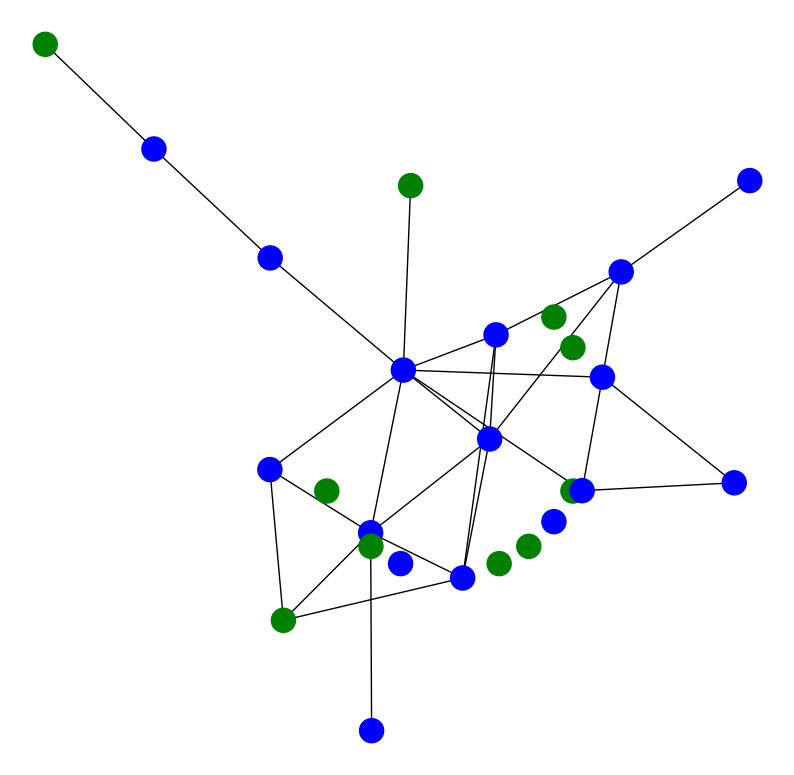

In [92]:
g = compareFiltered(networks.GetScseNetwork(), "position", "Professor", "Lecturer")

In [74]:
type(g)

matplotlib.figure.Figure

In [29]:
g.show()

NameError: name 'g' is not defined

In [ ]:
def show_figure(fig):

    # create a dummy figure and use its
    # manager to display "fig"  
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)
    return fig

In [ ]:
show_figure(g)

In [30]:
type(g)

NameError: name 'g' is not defined

In [ ]:
show_figure(g)

In [31]:
def draw_graph(G):
    f = plt.Figure(figsize=(5, 5), dpi=100)
    f.add_subplot
    nx.draw_kamada_kawai(G,with_labels=True)
    return f

In [32]:
f = draw_graph(G)

NameError: name 'G' is not defined

In [33]:
f = compareFiltered(networks.GetScseNetwork(), "position", "Professor")

NameError: name 'compareFiltered' is not defined

In [ ]:
f.show()

In [ ]:
filterGraphs(networks.GetScseNetwork(), "position", "Professor")

In [ ]:
def compare2(Graph,title,rank1,rank2):
    first = filterGraphs(Graph,title,rank1)
    print(rank1)
    print(nx.info(first))
    second = filterGraphs(Graph,title,rank2)
    print(rank2)
    print(nx.info(second))
    third = filterGraphs(Graph,title,rank1,rank2)
    print(nx.info(third))
    edge_diff = third.number_of_edges() - (first.number_of_edges() + second.number_of_edges())
    print("****************")
    print(edge_diff)
#print(nx.info(Profs))

In [34]:
compare2(networks.GetScseNetwork(), "position", "Professor", "Associate Professor")

NameError: name 'compare2' is not defined

In [ ]:

# color_map = []
# for node in tgt.node.data():
#     if node[1]['position'] == "Professor":
#         color_map.append('blue')
#     else: 
#         color_map.append('green')      
# nx.draw_kamada_kawai(tgt, node_color=color_map)
# #nx.draw_random(tgt, node_color=color_map)
# plt.show()

In [ ]:
print(nx.info(top_1000graph))
print("****************************")
# print(nx.clustering(networks.GetCoauthorNetwork()))
# centrality = nx.eigenvector_centrality(networks.GetCoauthorNetwork())
# print("****************************")
# print(sorted((v, f"{c:0.2f}") for v, c in centrality.items()))
# print("*****************************")
density = nx.density(top_1000graph)
print("Network density:", density)

In [35]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(top_1000graph))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(top_1000graph)
print(type(components))
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = top_1000graph.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

NameError: name 'top_1000graph' is not defined

In [ ]:
#https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python#lesson-goals

In [ ]:
nx.degree_histogram(tgt)

In [36]:
def GetScseReputationDistribution(graph, start_year=2000, end_year=2021):
    plt.close()
    authorReputation = []
    for author, data in graph.nodes.data():
        reputation = 0
                
        publications = data['publ']
        publications.sort(key=itemgetter('year'))

        for publ in publications:
            if int(publ['year']) in list(range(start_year, end_year+1)):
                if publ['tier'] == 1:
                    reputation += 3
                elif publ['tier'] == 2:
                    reputation += 2
                elif publ['tier'] == 3:
                    reputation += 1
        if reputation > 0:
            authorReputation.append((author, reputation))


    authorReputation.sort(key=lambda tup: tup[0], reverse=True)
    author, reputation = zip(*authorReputation)

    reputationCount = collections.Counter(reputation)
    reputationList, repCountList = zip(*reputationCount.items())

    pk = []
    N = len(authorReputation)
    for cnt in repCountList:
        pk.append(cnt/N)

    plt.figure()
    plt.scatter(reputationList, pk, c="r", s=10)

    plt.yscale('log')
    plt.xscale('log')

    # axes = plt.gca()
    # axes.set_xlim([0.9,max(degList)])
    # axes.set_ylim([min(pk)*0.1, 1])

    plt.scatter(reputationList, pk, c="r", s=10)

    plt.title("Author Reputation Distribution")
    plt.ylabel("P(Reputation)")
    plt.xlabel("Reputation")
    # plt.savefig("AuthorReputationDistribution.png")
    # graph too large to be drawn, but algorithms based on degree etc, can be done
    # plt.show()
    return plt, reputationList, pk

In [37]:
a,b,c,=GetScseReputationDistribution(G, start_year=2000, end_year=2021)

NameError: name 'G' is not defined

In [ ]:
GetScseReputationDistribution(top_1000graph)

In [38]:
GetScseReputationDistribution(networks.GetScseNetwork())

NameError: name 'networks' is not defined

In [ ]:
GetScseReputationDistribution(networks.GetCoauthorNetwork())

In [39]:
nx.info(top_1000graph)

NameError: name 'top_1000graph' is not defined

In [ ]:
nx.info(networks.GetScseNetwork())

In [ ]:
nx.info(networks.GetCoauthorNetwork())

In [40]:
top_1000graph.nodes.data()

NameError: name 'top_1000graph' is not defined

In [ ]:
networks.GetScseNetwork().nodes.data()